<a href="https://colab.research.google.com/github/usmang005/Deep-Learning-Models/blob/main/laptop_%26_lcd_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing dataset

In [1]:
# import tensorflow and check the version
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
# Importing dataset 
import pathlib
data = pathlib.Path("/content/drive/MyDrive/Datasets/Dataset")

In [3]:
!ls /content/drive/MyDrive/Datasets/Dataset

laptop	lcd


### Become one with data

In [4]:
# Let's create a function to visualize the number of images and floders and files in it
import os
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Datasets/Dataset"):
  print(f"There are {len(dirnames)} directories  and {len(filenames)} images in {dirpath}")

There are 2 directories  and 0 images in /content/drive/MyDrive/Datasets/Dataset
There are 0 directories  and 20 images in /content/drive/MyDrive/Datasets/Dataset/laptop
There are 0 directories  and 20 images in /content/drive/MyDrive/Datasets/Dataset/lcd


In [5]:
# Splt the folder in train and test folders
!pip install split-folders
import splitfolders
input_folder = "/content/drive/MyDrive/Datasets/Dataset"

splitfolders.ratio(input_folder, output ="Dataset_split",
                   seed = 42, ratio =(.7, .2, .1),
                   group_prefix= None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 40 files [00:54,  1.36s/ files]


In [6]:
# Get the class names
import numpy as np
class_names = np.array(sorted([item.name for item in data.glob("*")]))
print(class_names)

['laptop' 'lcd']


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Create a function to visualize that how many images are in every class in train directory
def num_images(dir_path):
  """
  Takes the path and show how many pictures are ther in the
  given class
  """

  num_images_train_dir = print(f"There are {len(os.listdir(dir_path))} images in {dir_path} .")
  num_images_train_dir
  return

In [9]:
num_images("Dataset_split/train/lcd")

There are 14 images in Dataset_split/train/lcd .


In [10]:
# Alright let's plot and visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Create a function to plot and visualize the images
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image) # To see the number of image that we are visualizing
  
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

In [ ]:
# View a random iamge from the training dataset
img = view_random_image(target_dir = "Dataset_split/train/",
                        target_class = "laptop")

In [12]:
tf.constant(img)

<tf.Tensor: shape=(3024, 4032, 3), dtype=uint8, numpy=
array([[[130, 119,  87],
        [139, 128,  96],
        [137, 126,  94],
        ...,
        [205, 186, 179],
        [206, 187, 180],
        [207, 188, 181]],

       [[126, 115,  83],
        [128, 117,  85],
        [128, 117,  85],
        ...,
        [204, 185, 178],
        [204, 185, 178],
        [205, 186, 179]],

       [[125, 114,  82],
        [129, 118,  86],
        [131, 120,  88],
        ...,
        [204, 185, 178],
        [204, 185, 178],
        [204, 185, 178]],

       ...,

       [[127, 126, 108],
        [116, 115,  97],
        [ 97,  96,  78],
        ...,
        [ 31,  33,  30],
        [ 39,  41,  38],
        [ 25,  27,  24]],

       [[125, 124, 106],
        [119, 118, 100],
        [105, 104,  86],
        ...,
        [ 39,  41,  38],
        [ 41,  43,  40],
        [ 28,  30,  27]],

       [[107, 106,  88],
        [118, 117,  99],
        [117, 116,  98],
        ...,
        [ 49,  51, 

In [13]:
img/255.

array([[[0.50980392, 0.46666667, 0.34117647],
        [0.54509804, 0.50196078, 0.37647059],
        [0.5372549 , 0.49411765, 0.36862745],
        ...,
        [0.80392157, 0.72941176, 0.70196078],
        [0.80784314, 0.73333333, 0.70588235],
        [0.81176471, 0.7372549 , 0.70980392]],

       [[0.49411765, 0.45098039, 0.3254902 ],
        [0.50196078, 0.45882353, 0.33333333],
        [0.50196078, 0.45882353, 0.33333333],
        ...,
        [0.8       , 0.7254902 , 0.69803922],
        [0.8       , 0.7254902 , 0.69803922],
        [0.80392157, 0.72941176, 0.70196078]],

       [[0.49019608, 0.44705882, 0.32156863],
        [0.50588235, 0.4627451 , 0.3372549 ],
        [0.51372549, 0.47058824, 0.34509804],
        ...,
        [0.8       , 0.7254902 , 0.69803922],
        [0.8       , 0.7254902 , 0.69803922],
        [0.8       , 0.7254902 , 0.69803922]],

       ...,

       [[0.49803922, 0.49411765, 0.42352941],
        [0.45490196, 0.45098039, 0.38039216],
        [0.38039216, 0

In [14]:
img.shape

(3024, 4032, 3)

### Normalization

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random_seed
tf.random.set_seed(42)

# Preprocessing data (get all of the pixel values between 0 & 1, this process is called normalization)
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)
valid_datagen = ImageDataGenerator(rescale = 1/255.)

# Setup paths to our data directory
train_dir = "Dataset_split/train"
test_dir = "Dataset_split/test"
valid_dir = "Dataset_split/val"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size = 32,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             seed = 42)

Found 28 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [34]:
# Get a saple of a train data batch
images, labels = train_data.next() # Get the "next batch" of images
len(images), len(labels)

(28, 28)

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
model_1 = Sequential([
 Conv2D(10, 3, activation ="relu"),
 MaxPool2D(),
 Conv2D(10, 3, activation = "relu"),
 MaxPool2D(),
 Conv2D(10, 3, activation = "relu"),
 Conv2D(10, 3, activation = "relu"),
 MaxPool2D(),
 Flatten(),
 Dense(1, activation= "sigmoid")
])

#2. Compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

#3. Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
                        )

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6796 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 0.6685 - accuracy: 0.5000 - val_loss: 0.6689 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 0.6427 - accuracy: 0.6429 - val_loss: 0.6536 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 6s 6s/step - loss: 0.6114 - accuracy: 0.7500 - val_loss: 0.6350 - val_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.5745 - accuracy: 0.7500 - val_loss: 0.6124 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 0.5310 - accuracy: 0.8214 - val_loss: 0.5864 - val_accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 6s 6s/step - loss: 0.4818 - accuracy: 0.9286 - val_loss: 0.5564 - val_accuracy: 0.7500
Epoch 8/10
1/1 [=========================

In [36]:
# Get the first two images
images[0].shape

(224, 224, 3)

In [37]:
model_1.evaluate(valid_data)

1/1 [==============================] - 1s 1s/step - loss: 0.4336 - accuracy: 1.0000


[0.4336291551589966, 1.0]

In [38]:
# Dwonloading our custom image to predict on
import matplotlib.image as mpimg
!wget https://www.czone.com.pk/Images/Thumbnails/copy-copy-copy-copy-copy-5dee1a3188a8e362142962-1540-9061-301219092600.jpg

--2022-07-04 05:47:39--  https://www.czone.com.pk/Images/Thumbnails/copy-copy-copy-copy-copy-5dee1a3188a8e362142962-1540-9061-301219092600.jpg
Resolving www.czone.com.pk (www.czone.com.pk)... 104.26.2.89, 104.26.3.89, 172.67.75.81, ...
Connecting to www.czone.com.pk (www.czone.com.pk)|104.26.2.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3965 (3.9K) [image/jpeg]
Saving to: ‘copy-copy-copy-copy-copy-5dee1a3188a8e362142962-1540-9061-301219092600.jpg.1’

copy-copy-copy-copy 100%[===================>]   3.87K  --.-KB/s    in 0s      

2022-07-04 05:47:39 (51.4 MB/s) - ‘copy-copy-copy-copy-copy-5dee1a3188a8e362142962-1540-9061-301219092600.jpg.1’ saved [3965/3965]



In [39]:
laptop = mpimg.imread("copy-copy-copy-copy-copy-5dee1a3188a8e362142962-1540-9061-301219092600.jpg")
laptop

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [40]:
# Createa function to imoprt an image and resize it to be ableto be used with our model
def load_and_prep(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into  tensor and reshape it to (img_shape,img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read_file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize (img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 an 1 )
  img = img/255.
  return img


In [41]:
laptop = load_and_prep("copy-copy-copy-copy-copy-5dee1a3188a8e362142962-1540-9061-301219092600.jpg")
laptop

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99608725, 0.99608725, 0.99608725]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99608725, 0.99608725, 0.99608725]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99608725, 0.99608725, 0.99608725]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.  

In [42]:
pred = model_1.predict(tf.expand_dims(laptop, axis = 0))

In [43]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'lcd'

In [44]:
def prep_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

No handles with labels found to put in legend.


Text(0, 0.5, 'Accuracy')

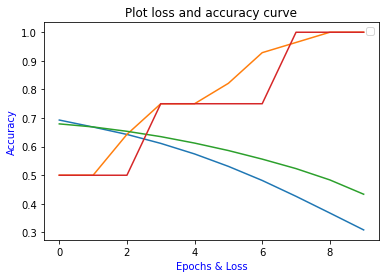

In [51]:
import pandas as pd
plt.title("Plot loss and accuracy curve")
plt.plot(pd.DataFrame(history_1.history))
plt.legend()
plt.xlabel("Epochs & Loss", c ="b")
plt.ylabel("Accuracy", c = "b")

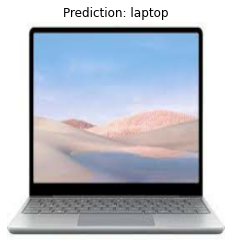

In [50]:
prep_and_plot(model_1, "laptop.jfif")

In [52]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 conv2d_7 (Conv2D)           (None, None, None, 10)   

In [53]:
model_1.save("saved_lcd_laptop_trained_model_1")

INFO:tensorflow:Assets written to: saved_lcd_laptop_trained_model_1/assets


In [60]:
loaded_model_1 = tf.keras.models.load_model("/content/drive/MyDrive/saved_lcd_laptop_trained_model_1")

In [61]:
loaded_model_1.evaluate(test_data)

1/1 [==============================] - 1s 813ms/step - loss: 0.3881 - accuracy: 1.0000


[0.3880928158760071, 1.0]